In [41]:
# https://www.geeksforgeeks.org/implementing-apriori-algorithm-in-python/

In [63]:
import numpy as np
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None
from mlxtend.frequent_patterns import apriori, association_rules

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 19, 9

In [43]:
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1

In [44]:
df = pd.read_csv('sanitized.csv', index_col = 0)

In [45]:
result = pd.get_dummies(df, columns=['COD_TRANS']).groupby(['SESSAO'], as_index=False).sum()

In [46]:
result.head()

,SESSAO,DATA,COD_TRANS_transacao_0,COD_TRANS_transacao_1,COD_TRANS_transacao_10,COD_TRANS_transacao_11,COD_TRANS_transacao_12,COD_TRANS_transacao_13,COD_TRANS_transacao_14,COD_TRANS_transacao_15,COD_TRANS_transacao_16,COD_TRANS_transacao_17,COD_TRANS_transacao_18,COD_TRANS_transacao_19,COD_TRANS_transacao_2,COD_TRANS_transacao_20,COD_TRANS_transacao_21,COD_TRANS_transacao_22,COD_TRANS_transacao_23,COD_TRANS_transacao_24,COD_TRANS_transacao_25,COD_TRANS_transacao_26,COD_TRANS_transacao_27,COD_TRANS_transacao_28,COD_TRANS_transacao_29,COD_TRANS_transacao_3,COD_TRANS_transacao_30,COD_TRANS_transacao_31,COD_TRANS_transacao_32,COD_TRANS_transacao_33,COD_TRANS_transacao_34,COD_TRANS_transacao_35,COD_TRANS_transacao_36,COD_TRANS_transacao_37,COD_TRANS_transacao_38,COD_TRANS_transacao_39,COD_TRANS_transacao_4,COD_TRANS_transacao_40,COD_TRANS_transacao_41,COD_TRANS_transacao_42,COD_TRANS_transacao_43,COD_TRANS_transacao_44,COD_TRANS_transacao_45,COD_TRANS_transacao_46,COD_TRANS_transacao_47,COD_TRANS_transacao_48,COD_TRANS_transacao_49,COD_TRANS_transacao_5,COD_TRANS_transacao_6,COD_TRANS_transacao_7,COD_TRANS_transacao_8,COD_TRANS_transacao_9
0,sessao_0,222100011019499,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0
1,sessao_1,242291161859490,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,3
2,sessao_10,201909100851845,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0
3,sessao_100,181718191572880,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
4,sessao_1000,181718190939089,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0


In [47]:
result = result.drop(['SESSAO', 'DATA'], 1)

In [58]:
distortions = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(result)
    kmeanModel.fit(result)
    distortions.append(sum(np.min(cdist(result, kmeanModel.cluster_centers_, 'euclidean'), axis = 1)) / result.shape[0])

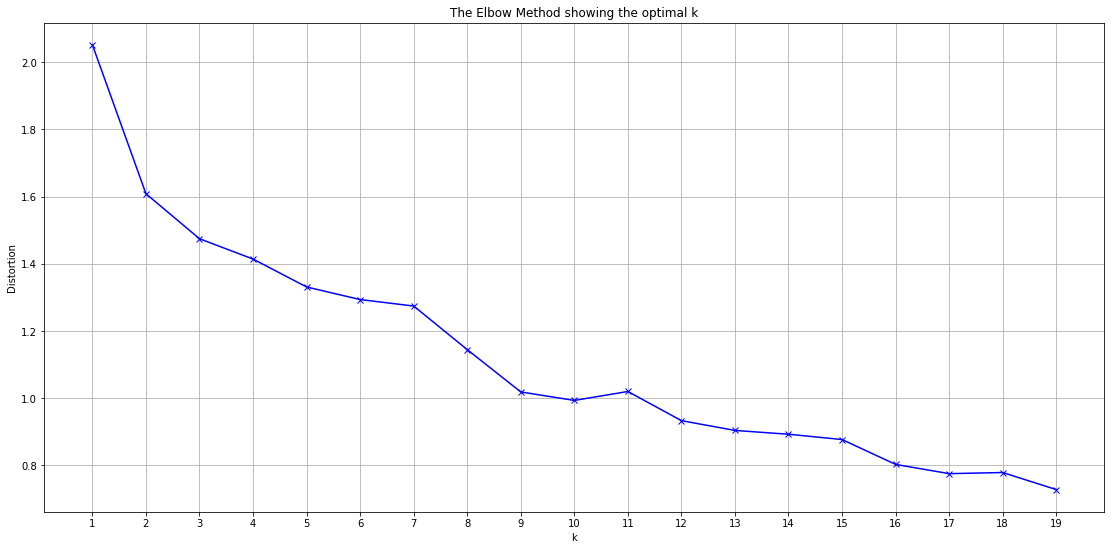

In [69]:
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 20, 1))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.grid()
plt.show()